In [2]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input
%matplotlib inline 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = 'train'
os.mkdir(train_dir)
val_dir = 'val'
os.mkdir(val_dir)
os.mkdir(os.path.join(train_dir, 'nv'))
os.mkdir(os.path.join(train_dir, 'mel'))
os.mkdir(os.path.join(train_dir, 'bkl'))
os.mkdir(os.path.join(train_dir, 'bcc'))
os.mkdir(os.path.join(train_dir, 'akiec'))
os.mkdir(os.path.join(train_dir, 'vasc'))
os.mkdir(os.path.join(train_dir, 'df'))
os.mkdir(os.path.join(val_dir, 'nv'))
os.mkdir(os.path.join(val_dir, 'mel'))
os.mkdir(os.path.join(val_dir, 'bkl'))
os.mkdir(os.path.join(val_dir, 'bcc'))
os.mkdir(os.path.join(val_dir, 'akiec'))
os.mkdir(os.path.join(val_dir, 'vasc'))
os.mkdir(os.path.join(val_dir, 'df')) 

In [4]:
!cp -r "/content/drive/MyDrive/HAM10000_metadata (1).csv" ./metadata

In [5]:
import pandas as pd
df_data = pd.read_csv('metadata')
df_data.head() 

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
y=df_data.dx
df_train,df_test=train_test_split(df_data,test_size=0.1,random_state=100,stratify=y)

In [7]:
print(df_train.shape)
print(df_test.shape)

(9013, 7)
(1002, 7)


In [8]:
df_train['dx'].value_counts()

nv       6034
mel      1002
bkl       989
bcc       463
akiec     294
vasc      128
df        103
Name: dx, dtype: int64

In [9]:
df_test['dx'].value_counts()

nv       671
mel      111
bkl      110
bcc       51
akiec     33
vasc      14
df        12
Name: dx, dtype: int64

In [10]:
all_img=list(df_data.image_id)
train_img=list(df_train.image_id)
test_img=list(df_test.image_id)

In [11]:
df_data.set_index('image_id', inplace=True)

In [12]:
folder_1 = os.listdir(r'/content/drive/MyDrive/skincancer/hampart1')
folder_2 = os.listdir(r'/content/drive/MyDrive/skincancer/hampart2')

In [13]:
for imgs in all_img:
    full_imgname=imgs+'.jpg'
    if imgs in train_img:
        sub_dir=train_dir
    else:
        sub_dir=val_dir
    if full_imgname in folder_1:
        source_dir=os.path.join(r'/content/drive/MyDrive/skincancer/hampart1',full_imgname)
    else:
        source_dir=os.path.join(r'/content/drive/MyDrive/skincancer/hampart2',full_imgname)       
    label=df_data.loc[imgs,'dx']
    final_dir=os.path.join(os.getcwd(),sub_dir,label,full_imgname)
    shutil.copyfile(source_dir, final_dir)

In [14]:
classes= ['nv','mel','bkl','bcc','akiec','vasc','df']

In [15]:
from sklearn.model_selection import train_test_split
from PIL import Image
import shutil
import cv2
import matplotlib.pyplot as plt

In [16]:
print(len(os.listdir('train/nv'))) 
print(len(os.listdir('train/mel'))) 
print(len(os.listdir('train/bkl'))) 
print(len(os.listdir('train/bcc'))) 
print(len(os.listdir('train/akiec'))) 
print(len(os.listdir('train/vasc'))) 
print(len(os.listdir('train/df'))) 
print('========================')
print(len(os.listdir('val/nv'))) 
print(len(os.listdir('val/mel'))) 
print(len(os.listdir('val/bkl'))) 
print(len(os.listdir('val/bcc'))) 
print(len(os.listdir('val/akiec'))) 
print(len(os.listdir('val/vasc'))) 
print(len(os.listdir('val/df'))) 

6034
1002
989
463
294
128
103
671
111
110
51
33
14
12


In [17]:
class_list = ['mel','bkl','bcc','akiec','vasc','df']
for item in class_list:
     
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)
    img_class = item
    img_list = os.listdir('train/' + img_class)
    for fname in img_list:
        shutil.copyfile(
            os.path.join('train/' + img_class, fname), 
            os.path.join(img_dir, fname))
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')
    batch_size = 50
     
    aug_datagen = datagen.flow_from_directory(
        'aug_dir',
        save_to_dir='train/' + img_class,
        save_format='jpg',
        target_size=(28,28),
        batch_size=batch_size)
    num_aug_images_wanted = 5000 
     
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))
    for i in range(0,num_batches):
        imgs, labels = next(aug_datagen)
         
    shutil.rmtree('aug_dir') 

Found 1002 images belonging to 1 classes.
Found 989 images belonging to 1 classes.
Found 463 images belonging to 1 classes.
Found 294 images belonging to 1 classes.
Found 128 images belonging to 1 classes.
Found 103 images belonging to 1 classes.


In [18]:
print(str(len(os.listdir('train/nv'))) + ' in nv dir')
print(str(len(os.listdir('train/mel'))) + ' in mel dir')
print(str(len(os.listdir('train/bkl'))) + ' in bkl dir')
print(str(len(os.listdir('train/bcc'))) + ' in bcc dir')
print(str(len(os.listdir('train/akiec'))) + ' in akiec dir')
print(str(len(os.listdir('train/vasc'))) + ' in vasc dir')
print(str(len(os.listdir('train/df'))) + ' in df dir')

6034 in nv dir
4858 in mel dir
4995 in bkl dir
4680 in bcc dir
4954 in akiec dir
4324 in vasc dir
3499 in df dir


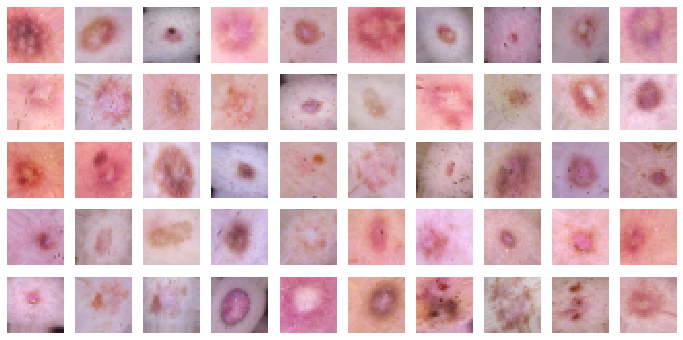

In [19]:
# plots images with labels within jupyter notebook

def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
         
plots(imgs, titles=None) 

In [20]:
x_train=[]
y_train=[]

for i in classes:
    path=os.path.join(os.getcwd(),train_dir,i)
    f=os.listdir(path)
    for imgs in f:
        show_img=cv2.imread(os.path.join(path,imgs))
        show_img=cv2.resize(show_img,(28,28))
        x_train.append(show_img)
        y_train.append(i)

In [21]:
x_train_n=np.array(x_train)
y_train_n=np.array(y_train)

In [22]:
print(x_train_n.shape)
print(y_train_n.shape)

(33344, 28, 28, 3)
(33344,)


In [23]:
x_test=[]
y_test=[]

for i in classes:
    path=os.path.join(os.getcwd(),val_dir,i)
    f=os.listdir(path)
    for imgs in f:
        show_img=cv2.imread(os.path.join(path,imgs))
        show_img=cv2.resize(show_img,(28,28),interpolation=cv2.INTER_AREA)
        x_test.append(show_img)
        y_test.append(i)

In [24]:
x_test_n=np.array(x_test)
y_test_n=np.array(y_test)

In [25]:
print(x_test_n.shape)
print(y_test_n.shape)

(1002, 28, 28, 3)
(1002,)


In [26]:
y_test_n =pd.get_dummies(y_test_n)
y_train_n =pd.get_dummies(y_train_n)

In [27]:
print(y_test_n.shape)
print(y_train_n.shape)

(1002, 7)
(33344, 7)


In [28]:
def preprocess(img):
    img = img/255
    return img

x_test_n = np.array(list(map(preprocess, x_test_n)))
x_train_n = np.array(list(map(preprocess, x_train_n)))

In [51]:
num_train_samples = len(x_train_n)
num_val_samples = len(x_test_n)
train_batch_size = 32
val_batch_size = 32 

In [52]:
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size) 

In [29]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dropout,Flatten,Dense


In [91]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512,activation='sigmoid'))
model.add(Dense(7,activation='softmax'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)              

In [92]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
class myCallback(tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.900):
            print("\nReached 79% val_accuracy so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [94]:
class myCallback1(tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.300):
            print("\nReached 79% val_accuracy so cancelling training!")
            self.model.stop_training = True
        
callback1 = myCallback1()

In [95]:
history=model.fit(x=x_train_n,y=y_train_n,verbose=1,callbacks=[callback,callback1],steps_per_epoch = train_steps,batch_size=train_batch_size,epochs=100,validation_data=(x_test_n,y_test_n))

Epoch 1/100
1042/1042 [==============================] - 34s 33ms/step - loss: 1.4629 - accuracy: 0.4168 - val_loss: 1.1106 - val_accuracy: 0.5888
Epoch 2/100
1042/1042 [==============================] - 34s 32ms/step - loss: 1.1721 - accuracy: 0.5434 - val_loss: 0.8505 - val_accuracy: 0.6926
Epoch 3/100
1042/1042 [==============================] - 34s 32ms/step - loss: 1.0870 - accuracy: 0.5761 - val_loss: 0.8245 - val_accuracy: 0.6986
Epoch 4/100
1042/1042 [==============================] - 34s 33ms/step - loss: 1.0197 - accuracy: 0.6037 - val_loss: 0.7947 - val_accuracy: 0.7086
Epoch 5/100
1042/1042 [==============================] - 34s 33ms/step - loss: 0.9674 - accuracy: 0.6239 - val_loss: 0.8275 - val_accuracy: 0.7006
Epoch 6/100
1042/1042 [==============================] - 34s 33ms/step - loss: 0.9292 - accuracy: 0.6421 - val_loss: 0.8322 - val_accuracy: 0.6956
Epoch 7/100
1042/1042 [==============================] - 34s 33ms/step - loss: 0.8841 - accuracy: 0.6554 - val_loss: 0

In [97]:
score=model.evaluate(x_test_n,y_test_n,verbose=0)
print(" test score: {} ".format(score[0]))
print("test accuracy: {}".format(score[1]))

 test score: 0.8945264220237732 
test accuracy: 0.7335329055786133


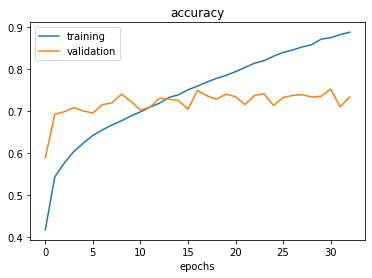

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

plt.legend(['training','validation'])

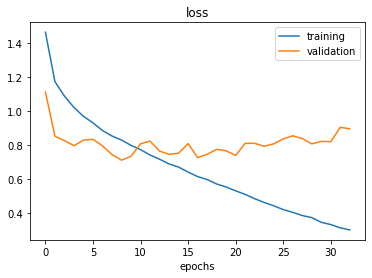

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'])

In [122]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving lesion.jpg to lesion.jpg


In [123]:
show_img=cv2.imread('lesion.jpg')

In [124]:
show_img=cv2.resize(show_img,(28,28))

In [125]:
show_img_n=np.array(show_img)

In [126]:
show_img_n=tensorflow.expand_dims(show_img_n, 0)
predictions=model.predict(show_img_n)

In [127]:
score = tensorflow.nn.softmax(predictions[0])


In [128]:
print(
    "This image most likely belongs to ",
    classes[np.argmax(score)]
)

This image most likely belongs to  df
